In [46]:
import numpy as np
import math
import matplotlib.pyplot as plt
import array
import pandas as pd
# constants 
nu = 1e-6
mu = 1e-3
rho = 1e3
gradP = -0.375
dt = 0.0001
# iterations

# building the domain
L1 = 0.04
L2 = 0.02

Ny = 35
Nx = int(Ny*2) 
# grid spacing
h = L1/Nx

#this is the ux average which will become the initial condition
IC = 0.0125

def Adv_x(i,j):
    return (1/h) * ( ((u[i+1,j]+ u[i,j])/2)**2 - ((u[i,j] -u[i-1,j])/2)**2 )

def Dif_x(i,j):
    return (1/h**2) * (u[i+1,j]+u[i-1,j]+u[i,j+1]+u[i,j-1] - 4*u[i,j])

def anal(y):
    return -187.5*y**2 + 0.01875

#Initialize everything 
u = np.full((Nx+2, Ny+2), IC)
u_star = np.zeros((Nx+2, Ny+2), dtype = float)
u_new = np.zeros((Nx+2, Ny+2),dtype = float)



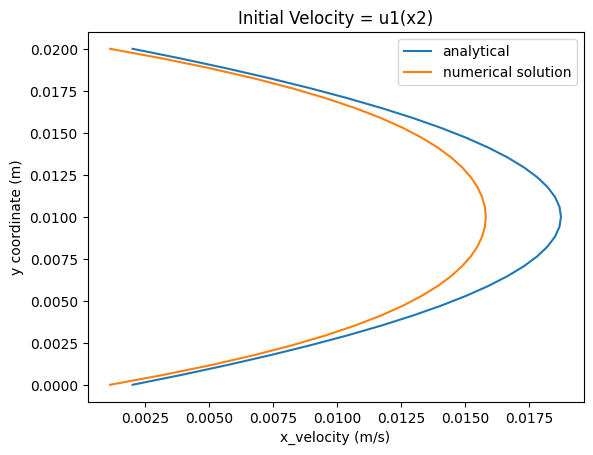

In [47]:

for n in range(0,1000):
    
    # Predictor step
    for j in range(1, Ny+1):
         for i in range(1, Nx+1):
             u_star[i,j] = u[i,j] + dt * (-Adv_x(i,j) + mu*Dif_x(i,j)) 
    # BC update
    for j in range(0, Ny+2):
        u_star[0,j] = u_star[-2, j] 
        u_star[-1,j] = u_star[1,j]
        
    for i in range(0,Nx+2):
         u_star[i,0]= -u_star[i,1]
         u_star[i,-1] = - u_star[i,-2]
    
    # Projection Step
    for j in range(1, Ny+1):
        for i in range(1, Nx+1):
            u_new[i,j] = u_star[i,j] - (1/rho)*(dt/h)*gradP   
    # BC update
    for j in range(0, Ny+2):
        u_new[0,j] = u_new[-2, j] 
        u_new[-1,j] = u_new[1,j]
    
    for i in range(0,Nx+2):
         u_new[i,0]= -u_new[i,1]
         u_new[i,-1] = - u_new[i,-2]
    
    u = u_new  



xlist = np.linspace(0,L1, Nx+2)
ylist = np.linspace(0,L2, Ny)
analist= np.linspace(-L2/2,L2/2,Ny+2)
X, Y = np.meshgrid(xlist, ylist)
analsol = np.zeros(Ny+2)
ylistanal=np.linspace(0,L2, Ny+2)
for i in range (0, Ny+1):
    analsol[i] = anal(analist[i])

Z = u
Z = u[:,1:Ny+1]
Z = np.transpose(Z)


# plt.contourf(X, Y, Z, 20, cmap='jet')
# colorbar = plt.colorbar()
# colorbar.set_label('x1_velocity (m/s)')
# plt.xlabel('$x_1$ (m)')
# plt.ylabel('$x_2$ (m)')
# plt.title('30 Pressure cells across channel')



Lnew = 0
for i in range (0,Ny+2):
    L = (u[i]-analsol[i])**2
    L = L[0].item()
    Lnew = Lnew + L

L_norm = math.sqrt(1/(Ny+2) * Lnew )    
analsol = analsol[1:Ny+1]
 
plt.title('Initial Velocity = u1(x2)')
plt.plot(analsol, ylist,label = 'analytical')
plt.plot(Z[:,1],ylist, label ='numerical solution')
plt.xlabel('x_velocity (m/s)')
plt.ylabel('y coordinate (m)')
plt.legend()   
# plt.text(0.01,0.01,'$L^2$ norm is 0.0144', fontsize = 10)
    
    
plt.show()

In [34]:
ylist.shape

(30,)